In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [199]:
steam = pd.read_csv('steam-store-games/steam.csv')

In [200]:
steam

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [201]:
price = steam["price"]
positive = steam["positive_ratings"]
negative = steam["negative_ratings"]

In [202]:
i = 0
total = 27075
percent_positive = []
percent_negative = []
percent_p = 0
percent_n = 0
while i <= 27074:
    percent_p = positive[i]/(positive[i] + negative[i])
    percent_n = negative[i]/(positive[i] + negative[i])
    percent_positive.append(percent_p)
    percent_negative.append(percent_n)
    i += 1

In [203]:
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})

df_percent_negative = pd.DataFrame(percent_negative)
df_test2 = df_percent_negative.join(steam, how='inner', lsuffix=' ', rsuffix=' ')
df_test2= df_test2.rename(columns = {0: 'Percent_Negative'})
df_test


,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,0.973888,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,0.961878,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,0.893871,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,0.965601,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


A correlação entre  é de 0.0764548929036528


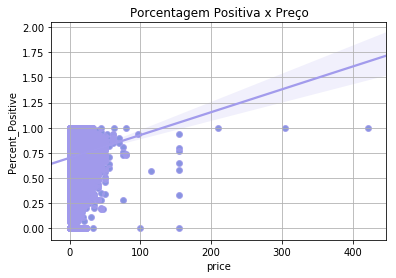

In [204]:
df_test.plot.scatter(x='price',y='Percent_Positive', loglog = False);
sns.regplot(df_test["price"],df_test["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test['price'].corr(df_test['Percent_Positive']))


In [187]:
df_test2 = df_test2.loc[(df_test2['price'] > 16) & (df_test2['price'] < 25)]
df_test2

,Percent_Negative,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
34,0.239130,1600,Dangerous Waters,2006-02-07,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,140,44,0,0,50000-100000,22.99
77,0.587413,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,Space;Simulation;Sci-fi,69,2832,4032,1744,3386,200000-500000,24.99
78,0.246377,2900,688(I) Hunter/Killer,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,52,17,0,0,20000-50000,22.99
79,0.196203,2910,Fleet Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player,Strategy,Strategy;Simulation;Naval,0,127,31,0,0,50000-100000,22.99
80,0.297872,2920,Sub Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player;Co-op;Includes leve...,Strategy,Strategy;Simulation;Naval,0,33,14,0,0,20000-50000,22.99
213,0.102881,8340,Strong Bad's Cool Game for Attractive People: ...,2008-12-18,1,Telltale Games,Telltale Games,windows;mac,0,Single-player,Adventure,Adventure;Point & Click;Comedy,0,218,25,0,0,100000-200000,22.99
522,0.291251,25000,Overgrowth,2017-10-16,1,Wolfire Games,Wolfire Games,windows;mac;linux,0,Single-player;Partial Controller Support;Inclu...,Action;Indie,Parkour;Action;Indie,0,3200,1315,777,1365,500000-1000000,22.99
837,0.121538,45760,Ultra Street Fighter® IV,2014-08-07,1,Capcom,Capcom,windows,0,Single-player;Multi-player;Steam Achievements;...,Action,Fighting;Arcade;Competitive,67,8247,1141,835,1056,500000-1000000,22.99
888,0.175910,47890,The Sims™ 3,2011-01-27,1,The Sims Studio,Electronic Arts,windows,0,Single-player,Simulation,Simulation;Character Customization;Sandbox,0,11679,2493,4730,499,2000000-5000000,24.99
1170,0.539216,200150,Battle Chess: Game of Kings™,2015-12-11,1,Olde Sküül;Sculptured Software,Interplay Entertainment Corp.,windows,0,Single-player;Multi-player;Cross-Platform Mult...,Casual;Strategy,Strategy;Chess;Casual,67,94,110,0,0,0-20000,22.99


A correlação entre  é de -0.07645489290365284


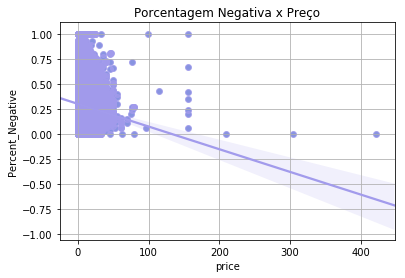

In [205]:
df_test2.plot.scatter(x='price',y='Percent_Negative', loglog = False);
sns.regplot(df_test2["price"],df_test2["Percent_Negative"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test2['price'].corr(df_test2['Percent_Negative']))


A correlação entre  é de -0.12371246883189997


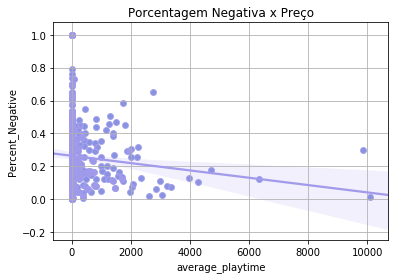

In [189]:
df_test2.plot.scatter(x='average_playtime',y='Percent_Negative', loglog = False);
sns.regplot(df_test2["average_playtime"],df_test2["Percent_Negative"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test2['average_playtime'].corr(df_test2['Percent_Negative']))

A correlação entre  é de 0.020406582386762646


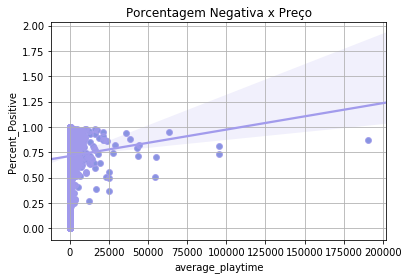

In [190]:
df_test.plot.scatter(x='average_playtime',y='Percent_Positive', loglog = False);
sns.regplot(df_test["average_playtime"],df_test["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', df_test['average_playtime'].corr(df_test['Percent_Positive']))


In [191]:
steam['genres'].str.contains("Action").value_counts()

False    15172
True     11903
Name: genres, dtype: int64

In [192]:
Action = steam['genres'].str.contains("Action")
Action.head()

0    True
1    True
2    True
3    True
4    True
Name: genres, dtype: bool

In [193]:
df_test4 = pd.DataFrame(Action)
df_test4.head()

,genres
0,True
1,True
2,True
3,True
4,True


In [194]:
df_test4 = pd.DataFrame(Action)
df_test4 = df_test4.rename(columns = {'genres':'Action'})
df_test4 = df_test4.join(df_test, how='inner', lsuffix=' ', rsuffix=' ')
df_test4

,Action,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,True,0.973888,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,True,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,True,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,True,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,True,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,True,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,True,0.961878,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,True,0.893871,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,True,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,True,0.965601,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [195]:
action_10 = df_test.loc[(df_test['price'] < 10) & (df_test['price'] > 4)]
action_30 = df_test.loc[(df_test['price'] < 30) & (df_test['price'] > 10)]
action_40 = df_test.loc[(df_test['price'] < 5) & (df_test['price'] > 0)]
action_100 = df_test.loc[(df_test['price'] > 100)]

In [196]:
action_40

,Percent_Positive,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1,0.839787,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,0.895648,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,0.826623,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,0.947996,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,0.801278,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
8,0.900990,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
13,0.884384,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled;Includes...,Action,Action;FPS;Multiplayer,0,6020,787,311,32,10000000-20000000,3.99
27,0.875070,1200,Red Orchestra: Ostfront 41-45,2006-03-14,1,Tripwire Interactive,Tripwire Interactive,windows;mac;linux,0,Multi-player;Steam Achievements;Valve Anti-Che...,Action,World War II;Action;FPS,44,1562,223,232,258,500000-1000000,3.99
36,0.806798,1630,Disciples II: Rise of the Elves,2006-07-06,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player;Co-op,Strategy,Strategy;Turn-Based Strategy;Fantasy,0,451,108,0,0,100000-200000,4.99
37,0.763240,1640,Disciples II: Gallean's Return,2006-07-06,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player;Co-op,Strategy,Turn-Based Strategy;Strategy;Classic,0,490,152,9,12,100000-200000,4.99


A correlação entre  é de 0.0813119361590231


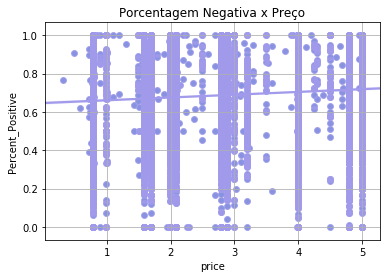

In [197]:
action_40.plot.scatter(x='price',y='Percent_Positive', loglog = False);
sns.regplot(action_40["price"],action_40["Percent_Positive"], color=('#a29bec'))
plt.title("Porcentagem Negativa x Preço")
plt.grid(True)
print('A correlação entre  é de', action_40['price'].corr(action_40['Percent_Positive']))
